In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('/content/heart_v2.csv')

EDA process


In [3]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
data.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
x=data.iloc[:,0:4]
y=data['heart disease']

In [7]:
colname=list(data.columns)
colname

['age', 'sex', 'BP', 'cholestrol', 'heart disease']

In [8]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [9]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((216, 4), (54, 4), (216,), (54,))

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3) # C5.0, max depth of tree = 3.
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'x[1] <= 0.5\nentropy = 0.991\nsamples = 216\nvalue = [120, 96]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 50.5\nentropy = 0.767\nsamples = 67\nvalue = [52, 15]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.23076923076923078, 0.375, 'x[0] <= 65.5\nentropy = 0.911\nsamples = 46\nvalue = [31, 15]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.961\nsamples = 39\nvalue = [24, 15]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 53.5\nentropy = 0.995\nsamples = 149\nvalue = [68, 81]'),
 Text(0.5384615384615384, 0.375, 'x[3] <= 178.5\nentropy = 0.948\nsamples = 71\nvalue = [45, 26]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.923\nsamples = 68\nvalue = [45, 23]'),
 Text(0.8461538461538461, 0.375, 'x[3] <= 279.5\nentropy = 0.875\nsamples = 78\nvalue

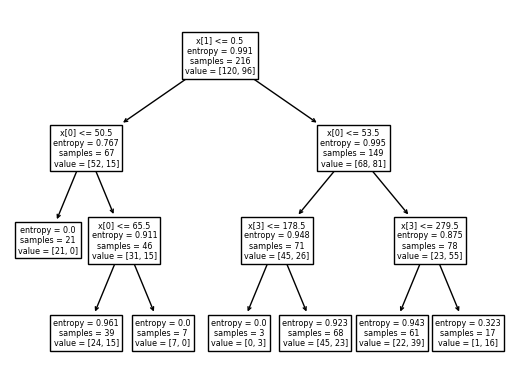

In [15]:
tree.plot_tree(model)

In [16]:
y_train.value_counts()

heart disease
0    120
1     96
Name: count, dtype: int64

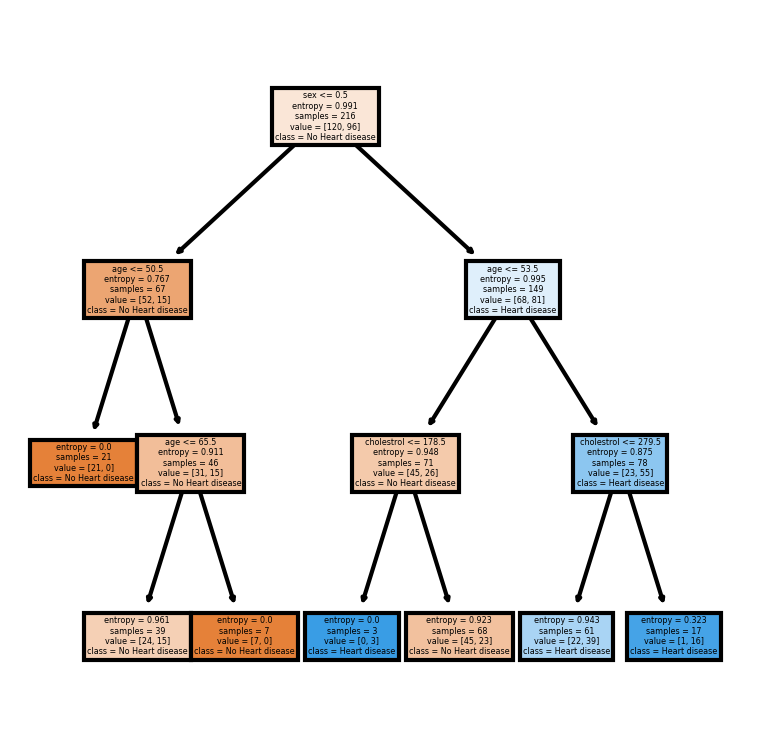

In [18]:
fn=colname[0:4]
cn=['No Heart disease','Heart disease']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [19]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()

0    30
1    24
Name: count, dtype: int64

In [21]:
pd.crosstab(y_test,preds)

col_0,0,1
heart disease,,
0,20,10
1,10,14


In [22]:
pd.crosstab(y_test,preds)

col_0,0,1
heart disease,,
0,20,10
1,10,14


In [26]:
accuracy=(20+14)/(20+10+10+14)
accuracy

0.6296296296296297

In [28]:
model.score(x_test,y_test)

0.6296296296296297

In [ ]:
#the important feature analysed by decision tree is sex ie male female and after that age is the 2nd most important feature
#